Dữ liệu được scale trước khi training và inverse transform trước khi đánh giá. ???


### **LSTM (Long Short-Term Memory): Giải thích đơn giản**

---

#### **Định nghĩa đơn giản**:
- LSTM là một thuật toán thông minh trong lĩnh vực Trí tuệ Nhân tạo (AI), được sử dụng để **hiểu và dự đoán các chuỗi sự kiện theo thời gian**.
- Nó giống như một cuốn sổ tay thần kỳ, có thể **ghi nhớ những điều quan trọng trong quá khứ** và **quên những điều không quan trọng**, để đưa ra dự đoán chính xác hơn.

---

#### **Ví dụ đơn giản**:
1. **Ký ức của bạn về một bài kiểm tra:**
   - Bạn đang học để thi. Đầu tiên, bạn nhớ rất nhiều thứ, nhưng sau một thời gian, bạn quên đi các chi tiết không quan trọng (ví dụ: màu bút bạn dùng), nhưng vẫn giữ lại những gì cần thiết (công thức toán).
   - LSTM hoạt động tương tự: nó quyết định nên nhớ hay quên thông tin cũ, dựa vào độ quan trọng của chúng.

2. **Dự đoán giá cổ phiếu:**
   - Để dự đoán giá cổ phiếu ngày mai, ta không chỉ dựa vào giá hôm nay mà còn cả **xu hướng dài hạn** (ví dụ, giá đang tăng đều trong 1 tháng) và **sự kiện gần đây** (ví dụ, thông báo từ công ty hôm qua). LSTM sẽ ghi nhớ cả hai loại thông tin này.

---

#### **Cách hoạt động của LSTM:**
1. **Ba cánh cửa thần kỳ:**
   - LSTM có ba "cửa" để quản lý thông tin:
     - **Cửa quên**: Quyết định quên thông tin nào không còn quan trọng.
     - **Cửa nhớ**: Quyết định thêm thông tin nào mới vào "trí nhớ dài hạn".
     - **Cửa đầu ra**: Quyết định sử dụng phần nào của trí nhớ để đưa ra dự đoán.

2. **Cách chúng làm việc:**
   - Mỗi bước, LSTM kiểm tra thông tin đầu vào và quyết định "giữ gì", "quên gì", và "nên dự đoán gì tiếp theo".

---

#### **So sánh với Linear Regression, Lasso và Ridge**:
| **Thuật toán**         | **Dùng cho loại dữ liệu nào**                  | **Điểm mạnh**                                  | **Điểm yếu**                                |
|-------------------------|-----------------------------------------------|-----------------------------------------------|--------------------------------------------|
| **Linear Regression**   | Dữ liệu không thời gian, quan hệ tuyến tính    | Dễ hiểu, nhanh                                | Không phù hợp với chuỗi thời gian           |
| **Lasso & Ridge**       | Dữ liệu nhiều yếu tố, cần giảm overfitting     | Giảm phức tạp, chọn lựa yếu tố quan trọng     | Không hiểu mối quan hệ theo thời gian       |
| **LSTM**                | Chuỗi thời gian, dữ liệu có mối quan hệ phức tạp| Hiểu được mối quan hệ dài hạn và ngắn hạn    | Phức tạp, cần nhiều tài nguyên tính toán    |


In [1]:
!pip install tensorflow
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

## Lưu thêm kết quả vào file txt


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0217
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.2168e-04
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9459e-04
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9194e-04
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7234e-04
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.6907e-04
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7810e-04
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5343e-04
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4423e-04
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.7750e-04
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4749e-04
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9288e-04
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.8419e-04
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4857e-04
Epoch 15/50
35/35 ━━

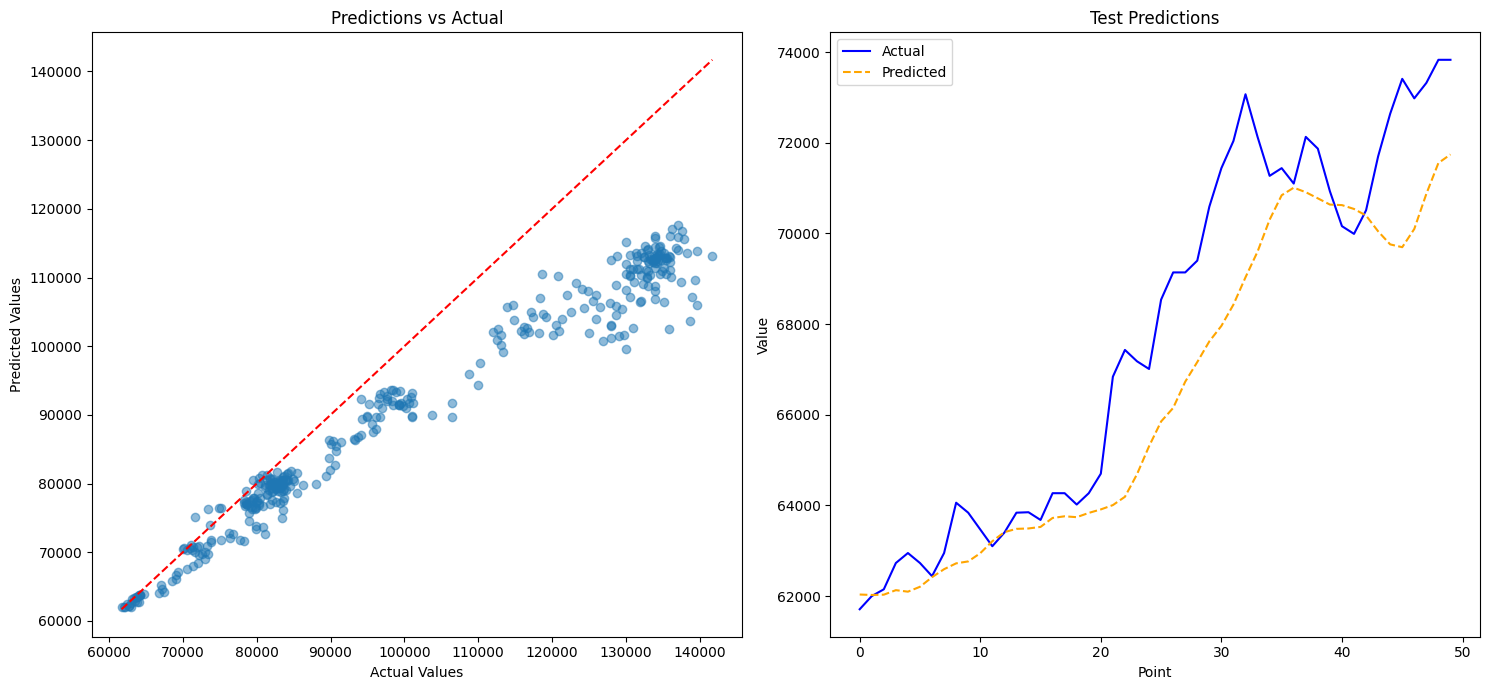

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results\FPT_stock_data_TrainingModelsResults.txt


In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import os

class TimeSeriesLSTMModel:
    def __init__(self, data_path, look_back=10, output_dir=None):
        """
        Initialize the class with the file path of the dataset and look-back window.
        """
        self.data_path = data_path
        self.look_back = look_back

        # Set output directory and file path
        if output_dir:
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)
            base_filename = os.path.basename(data_path).replace(".csv", "_TrainingModelsResults.txt")
            self.output_path = os.path.join(output_dir, base_filename)
        else:
            self.output_path = data_path.replace(".csv", "_TrainingModelsResults.txt")
            
        self.data = None
        self.model = None
        self.scaler_X = MinMaxScaler(feature_range=(0, 1))
        self.scaler_y = MinMaxScaler(feature_range=(0, 1))

    def load_and_preprocess_data(self):
        """
        Load the dataset and preprocess the data for LSTM.
        """
        # Load data
        self.data = pd.read_csv(self.data_path)
        self.data["close_tomor"] = self.data["close"].shift(-1)
        self.data = self.data.iloc[:-1]  # Remove last row

        # Define features and target
        X = self.data.drop(["close_tomor", "time"], axis=1)
        y = self.data["close_tomor"].values.reshape(-1, 1)

        # Scale features and target
        X_scaled = self.scaler_X.fit_transform(X)
        y_scaled = self.scaler_y.fit_transform(y)

        # Create sequences
        X_sequences, y_sequences = [], []
        for i in range(self.look_back, len(y_scaled)):
            X_sequences.append(X_scaled[i - self.look_back:i, :])  # Sequence of look_back days
            y_sequences.append(y_scaled[i, 0])  # Target value

        X_sequences, y_sequences = np.array(X_sequences), np.array(y_sequences)

        # Split into training and testing sets
        train_size = int(len(X_sequences) * 0.75)
        X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
        y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]

        return X_train, X_test, y_train, y_test

    def build_model(self):
        """
        Build the LSTM model.
        """
        self.model = Sequential([
            LSTM(50, activation='relu', return_sequences=True, input_shape=(self.look_back, self.data.shape[1] - 2)),
            LSTM(50, activation='relu'),
            Dense(1)
        ])
        self.model.compile(optimizer='adam', loss='mse')

    def train_model(self, X_train, y_train, epochs=50, batch_size=32):
        """
        Train the LSTM model.
        """
        early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[early_stop])

    def evaluate_model(self, y_train, y_pred_train, y_test, y_pred_test):
        """
        Evaluate the model performance and write results to a file.
        """
        # Reverse transform predictions and actual values
        y_train_rescaled = self.scaler_y.inverse_transform(y_train.reshape(-1, 1))
        y_pred_train_rescaled = self.scaler_y.inverse_transform(y_pred_train.reshape(-1, 1))
        y_test_rescaled = self.scaler_y.inverse_transform(y_test.reshape(-1, 1))
        y_pred_test_rescaled = self.scaler_y.inverse_transform(y_pred_test.reshape(-1, 1))

        # Metrics for train set
        r2_train = r2_score(y_train_rescaled, y_pred_train_rescaled)
        mse_train = mean_squared_error(y_train_rescaled, y_pred_train_rescaled)
        rmse_train = np.sqrt(mse_train)
        mae_train = mean_absolute_error(y_train_rescaled, y_pred_train_rescaled)
        mape_train = mean_absolute_percentage_error(y_train_rescaled, y_pred_train_rescaled) * 100

        # Metrics for test set
        r2_test = r2_score(y_test_rescaled, y_pred_test_rescaled)
        mse_test = mean_squared_error(y_test_rescaled, y_pred_test_rescaled)
        rmse_test = np.sqrt(mse_test)
        mae_test = mean_absolute_error(y_test_rescaled, y_pred_test_rescaled)
        mape_test = mean_absolute_percentage_error(y_test_rescaled, y_pred_test_rescaled) * 100

        # Write results to file
        with open(self.output_path, "a") as file:
            file.write(f"Model: LSTM Model\n")
            file.write(f"File Path: {self.data_path}\n")
            file.write("TRAIN SET METRICS:\n")
            file.write(f"R2: {r2_train:.4f}\n")
            file.write(f"MSE: {mse_train:.4f}\n")
            file.write(f"RMSE: {rmse_train:.4f}\n")
            file.write(f"MAE: {mae_train:.4f}\n")
            file.write(f"MAPE%: {mape_train:.2f}%\n\n")
            file.write("TEST SET METRICS:\n")
            file.write(f"R2: {r2_test:.4f}\n")
            file.write(f"MSE: {mse_test:.4f}\n")
            file.write(f"RMSE: {rmse_test:.4f}\n")
            file.write(f"MAE: {mae_test:.4f}\n")
            file.write(f"MAPE%: {mape_test:.2f}%\n")
            file.write("=" * 50 + "\n")

    def plot_predictions(self, y_test, y_pred, num_samples=50):
        """
        Plot predictions vs actual values with both scatter and line plots.
        """
        y_test_rescaled = self.scaler_y.inverse_transform(y_test.reshape(-1, 1))
        y_pred_rescaled = self.scaler_y.inverse_transform(y_pred.reshape(-1, 1))

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

        # Scatter plot
        ax1.scatter(y_test_rescaled, y_pred_rescaled, alpha=0.5)
        ax1.set_title("Predictions vs Actual")
        ax1.set_xlabel("Actual Values")
        ax1.set_ylabel("Predicted Values")
        
        # Add y=x line
        min_val = min(y_test_rescaled.min(), y_pred_rescaled.min())
        max_val = max(y_test_rescaled.max(), y_pred_rescaled.max())
        ax1.plot([min_val, max_val], [min_val, max_val], 'r--')

        # Line plot
        x_points = range(num_samples)
        ax2.plot(x_points, y_test_rescaled[:num_samples], 'b-', label='Actual')
        ax2.plot(x_points, y_pred_rescaled[:num_samples], 'orange', linestyle='--', label='Predicted')
        
        ax2.set_title("Test Predictions")
        ax2.set_xlabel("Point")
        ax2.set_ylabel("Value")
        ax2.legend()

        plt.tight_layout()
        plt.show()

    def process(self):
        """
        Execute the full pipeline: load, preprocess, train, evaluate, and plot.
        """
        X_train, X_test, y_train, y_test = self.load_and_preprocess_data()
        self.build_model()
        self.train_model(X_train, y_train)
        y_pred_train = self.model.predict(X_train)
        y_pred_test = self.model.predict(X_test)
        self.evaluate_model(y_train, y_pred_train, y_test, y_pred_test)
        self.plot_predictions(y_test, y_pred_test)
        print(f"Results have been saved to: {self.output_path}")


# Example usage
data_path = "D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/FPT_stock_data.csv"
output_dir = "D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results"

model = TimeSeriesLSTMModel(data_path, output_dir=output_dir)
model.process()


Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/CMG_stock_data.csv

Epoch 1/50


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0211
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.5668e-04
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5210e-04
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.6802e-04
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6193e-04
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.1780e-04
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2351e-04
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9029e-04
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8550e-04
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7821e-04
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1416e-04
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2477e-04
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2428e-04
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2365e-04
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7m

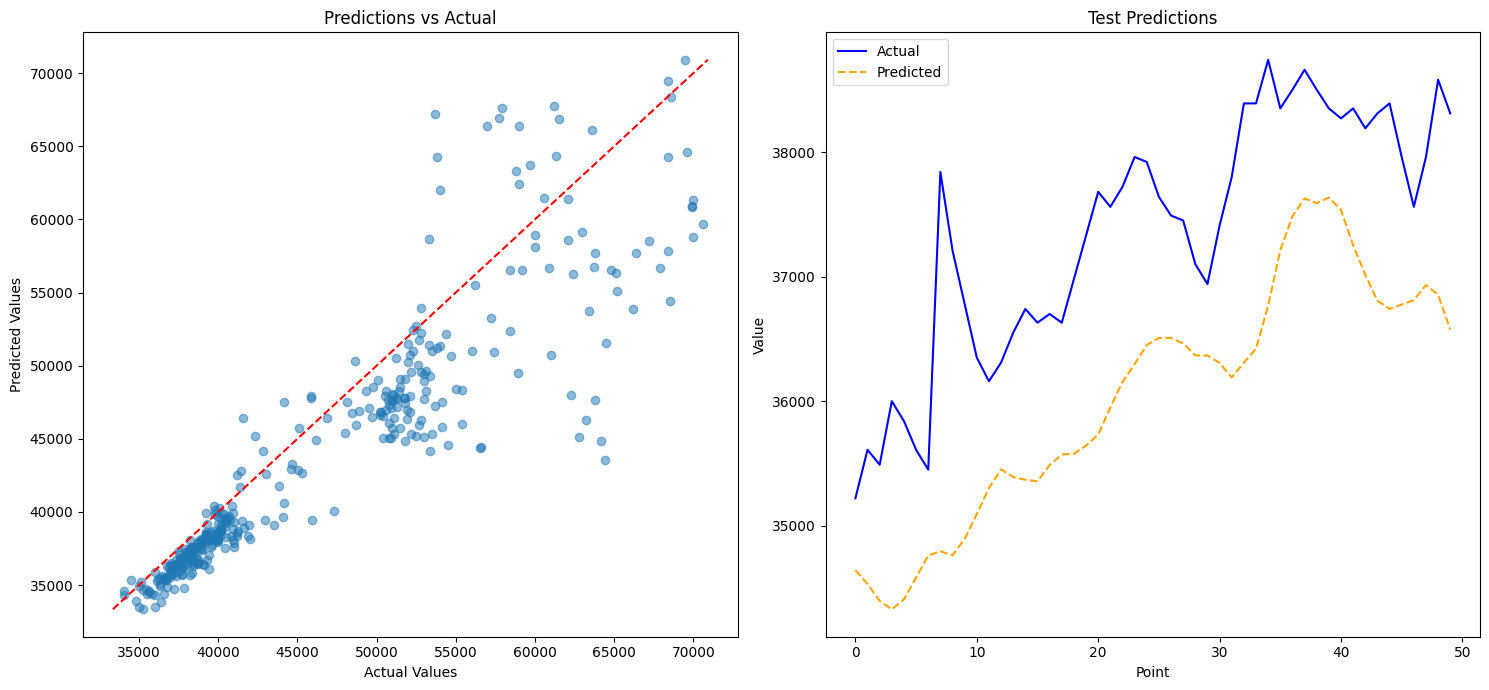

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results/CMG_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/CMT_stock_data.csv

Epoch 1/50


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0292
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0018
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0018
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.6556e-04
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 
Epoch 16/50
35/35 ━━━━

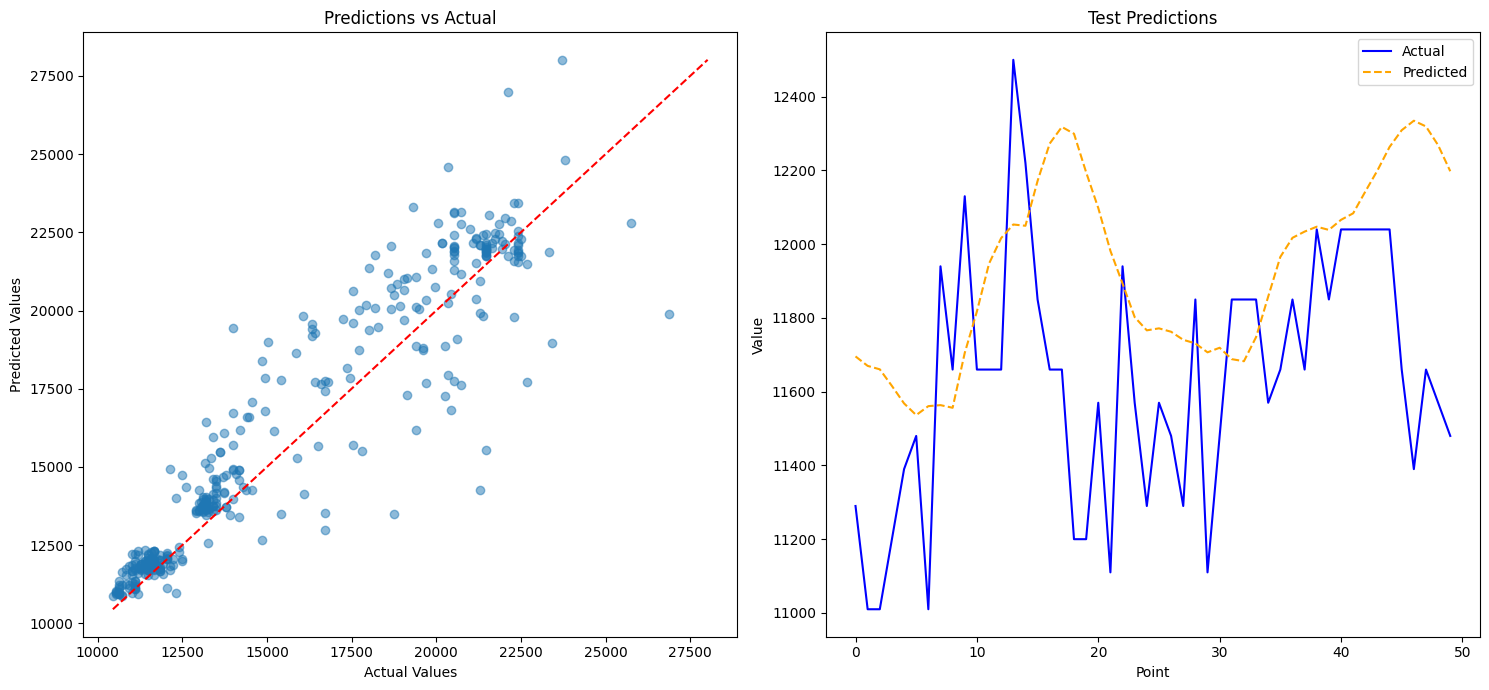

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results/CMT_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/DGW_stock_data.csv

Epoch 1/50


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0901
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0032
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010   
Epoch 16/50
35/35 ━━━━

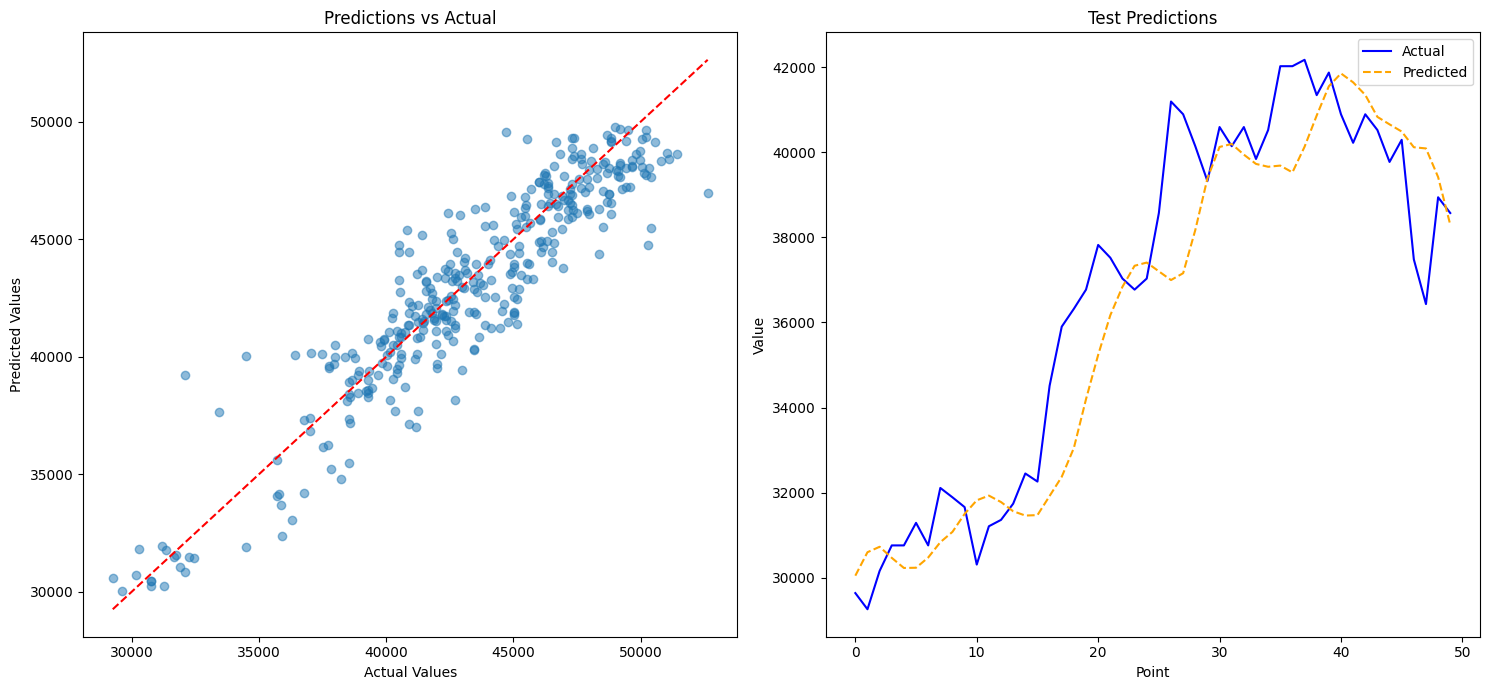

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results/DGW_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/ELC_stock_data.csv

Epoch 1/50


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0340
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.4914e-04
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.3150e-04
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3352e-04
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.3712e-04
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.5208e-04
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.9428e-04
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5371e-04
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.8221e-04
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.5930e-04
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.0148e-04
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.6251e-04
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.5766e-04
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/st

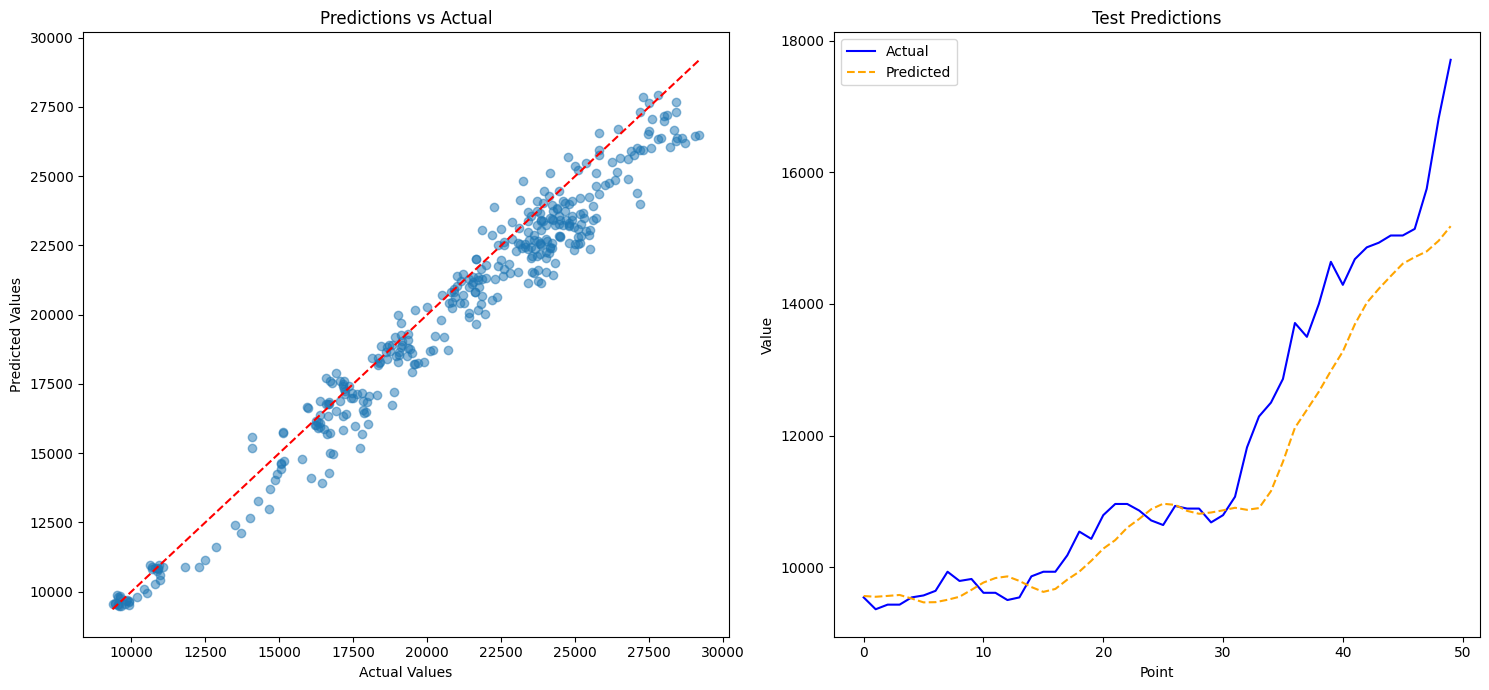

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results/ELC_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/FPT_stock_data.csv

Epoch 1/50


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0203
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.6143e-04
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9450e-04
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7424e-04
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7018e-04
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9946e-04
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1076e-04
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6680e-04
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9192e-04
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6879e-04
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.7866e-04
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4897e-04
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0693e-04
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5505e-04
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0

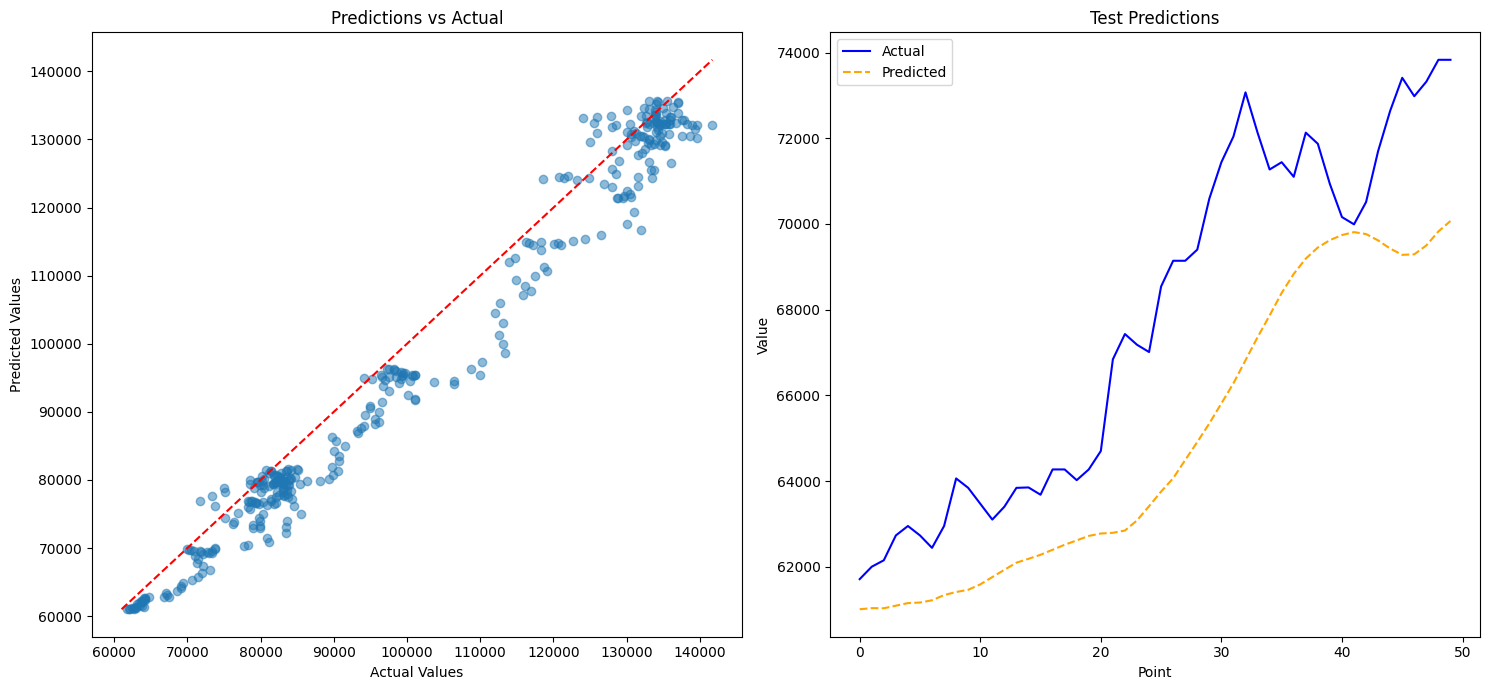

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results/FPT_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/SAM_stock_data.csv

Epoch 1/50


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0491
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0041
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0023
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0018
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0016
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0020
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0021
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015
Epoch 16/50
35/35 ━━━━━━━━━

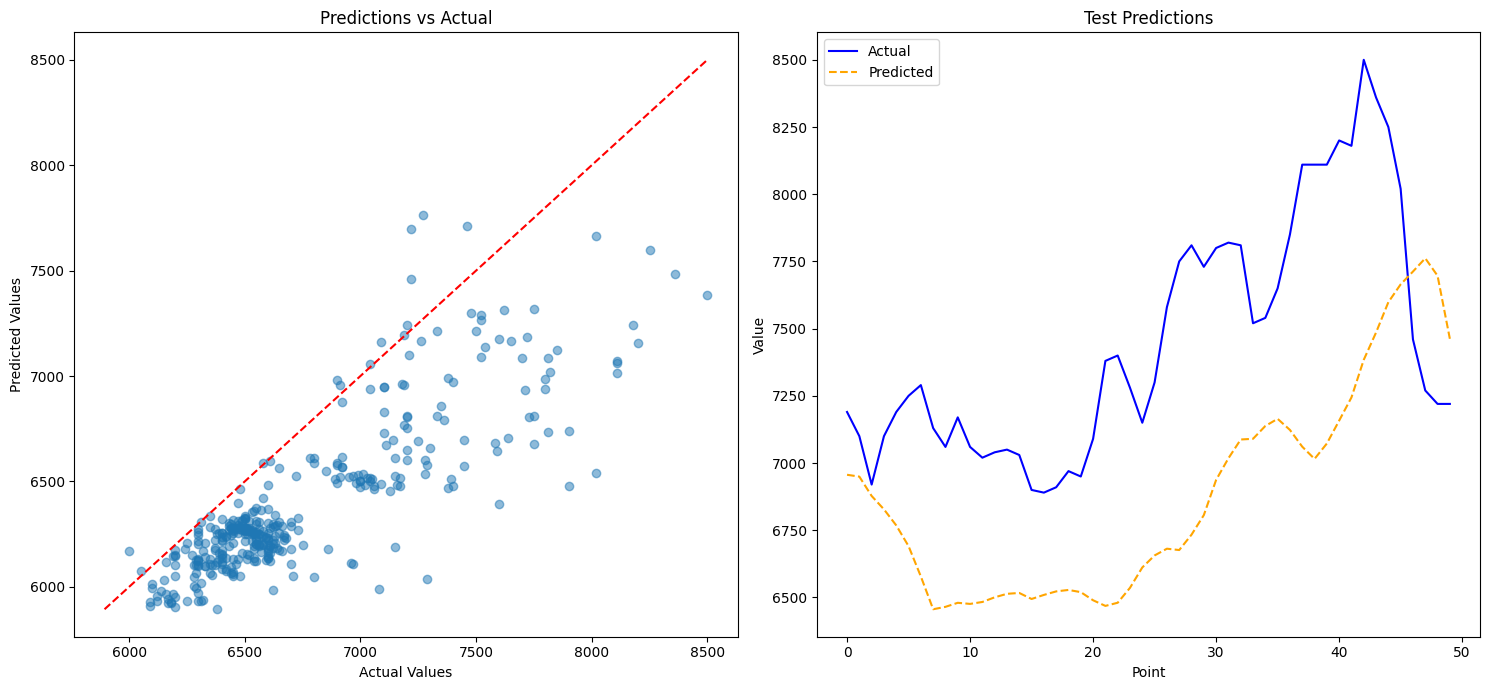

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results/SAM_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/VGC_stock_data.csv

Epoch 1/50


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0634
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018  
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016  
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014  
Epoch 16/50
35/35 ━━━━━━

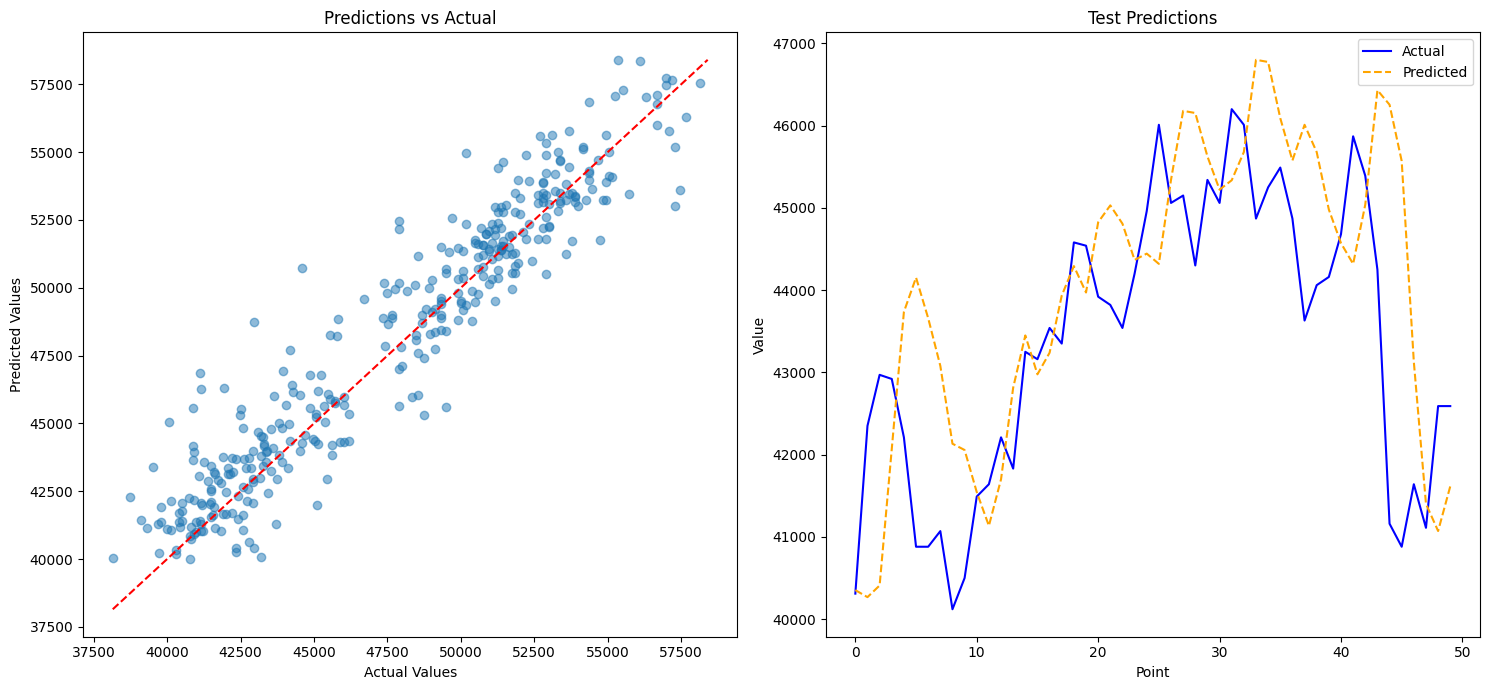

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results/VGC_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/VGI_stock_data.csv

Epoch 1/50


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0133
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.7255e-04
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2227e-04
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4383e-04
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9899e-04
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2461e-04
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0777e-04
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4640e-04
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1258e-04
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4834e-04
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2431e-04
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4786e-04
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1770e-04
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4226e-04
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7m

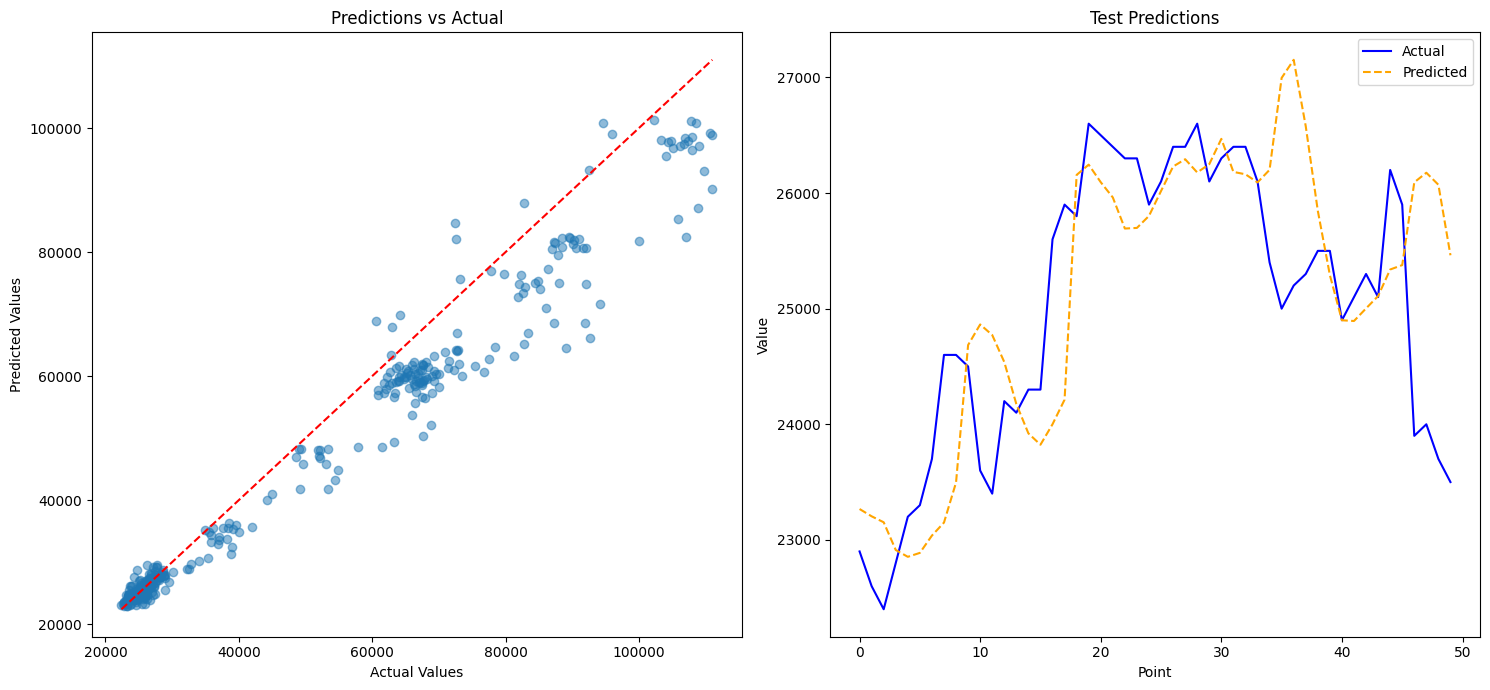

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results/VGI_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/VTL_stock_data.csv

Epoch 1/50


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1163
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0038
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0041
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0026
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0039
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020  
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021 
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018
Epoch 16/50
33/33 ━━━━━━━

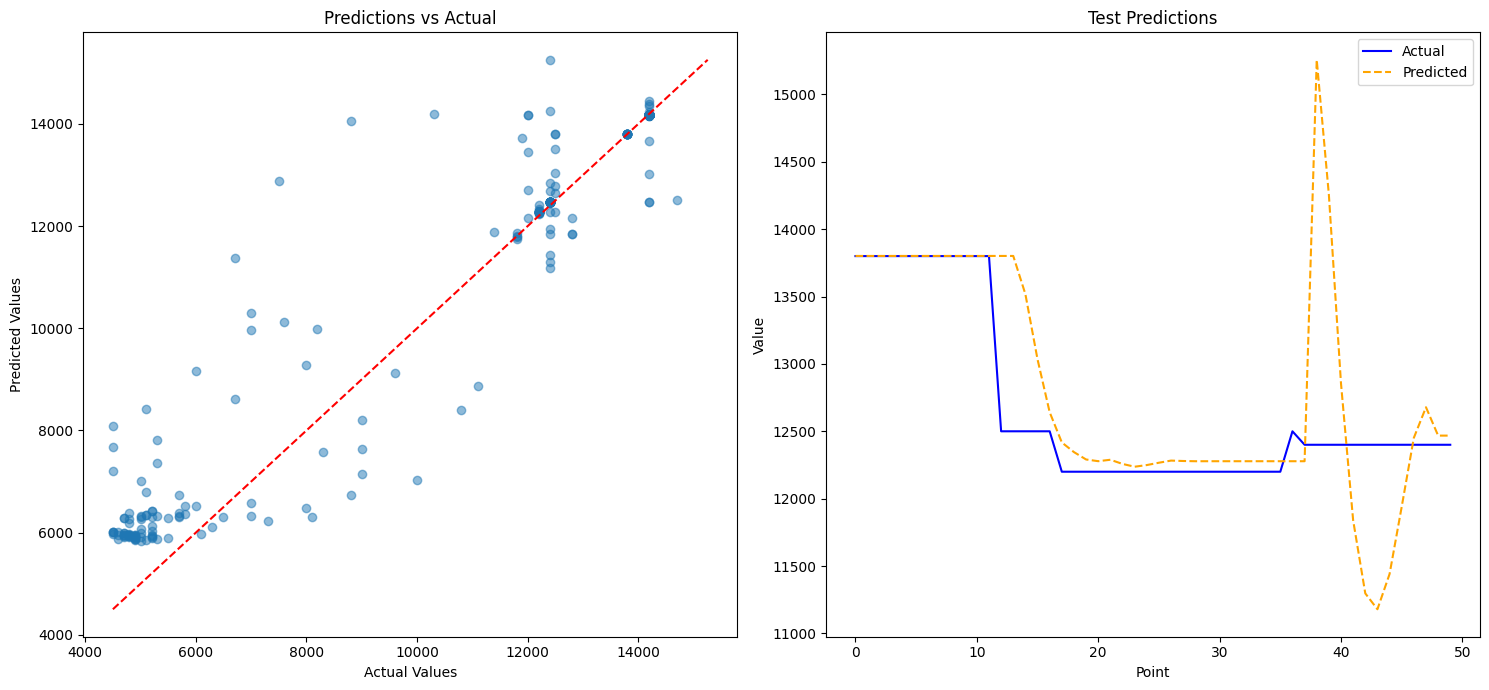

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results/VTL_stock_data_TrainingModelsResults.txt
Processing file: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/VTP_stock_data.csv

Epoch 1/50


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0551
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.5574e-04
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.6180e-04
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3671e-04
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.4757e-04
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.8087e-04
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.1786e-04
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.3352e-04
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.2369e-04
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4506e-04
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.9430e-04
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3498e-04
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6730e-04
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/s

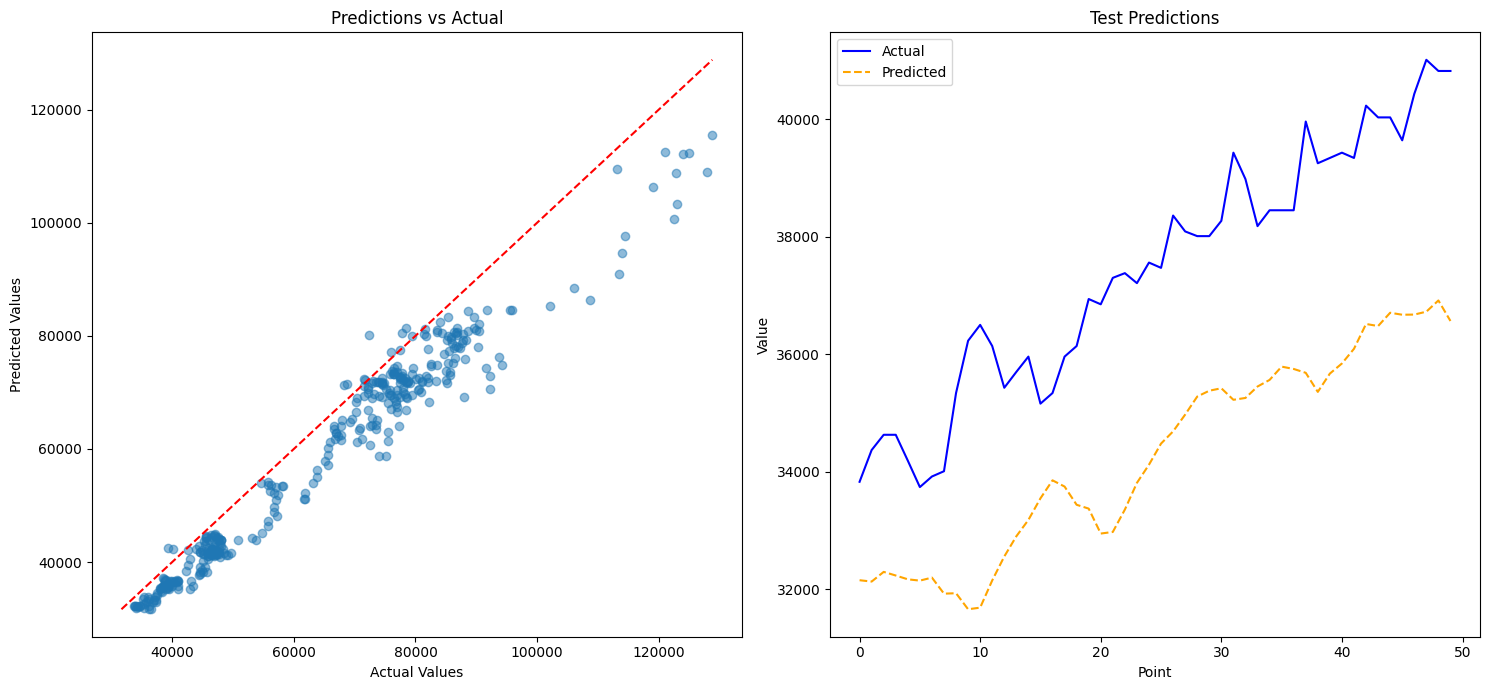

Results have been saved to: D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results/VTP_stock_data_TrainingModelsResults.txt


In [5]:
import os

folder_path = "D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/"
output_dir = "D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/results/"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".csv")]

for file_path in file_paths:
    print(f"Processing file: {file_path}")
    print()
    try:
        model = TimeSeriesLSTMModel(file_path, output_dir=output_dir)
        model.process()
    except Exception as e:
        print(f"An error occurred while processing {file_path}: {e}")
    print("=" * 50)
